In [107]:
## imports

import visualisation
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.cm as cm


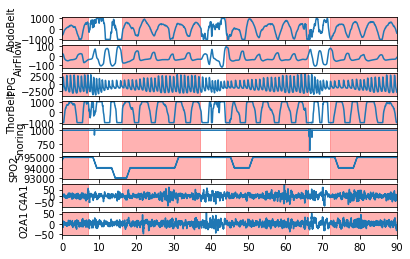

In [7]:
### Visualisation of the data

PATH_TO_TRAINING_DATA = "additional_files_dreem/X_train.h5"
PATH_TO_TRAINING_TARGET = "y_train_tX9Br0C.csv"
h5_file = h5py.File(PATH_TO_TRAINING_DATA, 'r')
mask = np.array(pd.read_csv(PATH_TO_TRAINING_TARGET))
visualisation.visualise_index(1625, h5_file, mask) # weird snoring score around 1619 -> sensor disconnected ?

In [21]:
## Exploration of the data

myFile = np.genfromtxt('y_train_tX9Br0C.csv', delimiter=',')
myFile = myFile[1:] ## removing first row y_0, y_2,..., y_89
myFile = myFile[:,1:] ## removing first columns corresponding to IDs

## number of apnea seconds

In [68]:
np.mean(sums), np.median(sums), np.var(sums)

(6.185, 0.0, 203.94759318181818)

Number of seconds of apnea over number of seconds of sleep in % for each window of all patients : 
 
 [17.77777778  0.          0.         ...  0.          0.
  0.        ]


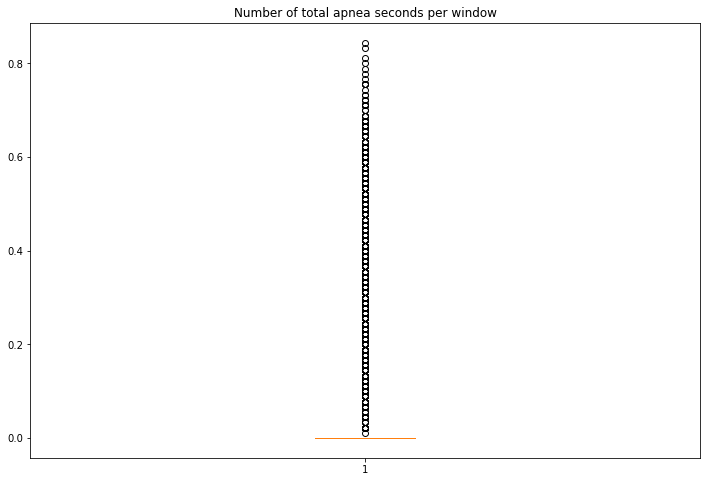

In [66]:
## nb of apnea seconds in total per window

nb_windows_per_patient = 200
nb_patients = 22
window_time = 90

sums = np.sum(myFile, axis=1)
print('Number of seconds of apnea over number of seconds of sleep in % for each window of all patients : \n \n',100 * sums/(window_time))

plt.figure(figsize =(12,8))
plt.boxplot(sums/(window_time))
plt.title("Number of total apnea seconds per window")
plt.show()

In [61]:
np.shape(sums)

(4400,)

Number of seconds of apnea over number of seconds of sleep in % for each patient : 
 
 [ 0.98888889  2.9         9.56111111  7.96666667 27.23888889  7.96666667
  5.75        6.95       13.77222222  1.12777778 10.30555556  2.11666667
 12.18333333  1.63333333  1.15        3.40555556  5.93333333  0.74444444
 19.21111111  1.62777778  1.38888889  7.26666667]


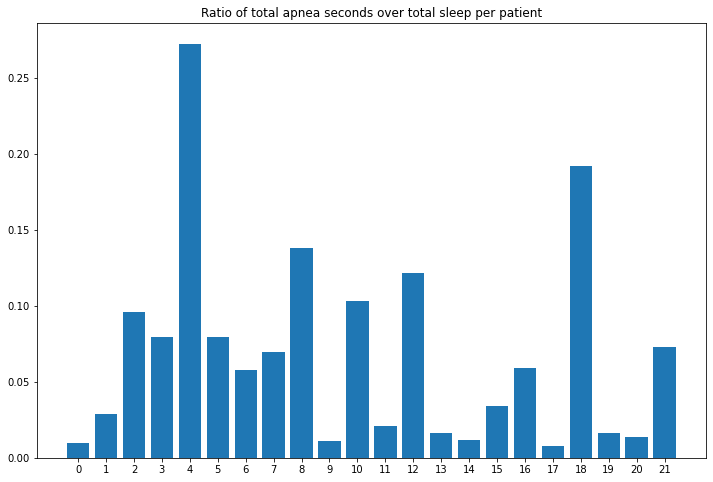

In [58]:
## Let us see how the number total of apnea seconds is correlated to the patient we consider
patients_buckets = np.zeros(nb_patients)

for i in range(nb_patients):
    patients_buckets[i] = np.sum(sums[i * nb_windows_per_patient:(i+1)*nb_windows_per_patient])
    
print('Number of seconds of apnea over number of seconds of sleep in % for each patient : \n \n',100 * patients_buckets/(window_time*nb_windows_per_patient))

plt.figure(figsize =(12,8))
plt.bar(range(nb_patients), patients_buckets/(window_time*nb_windows_per_patient))
plt.xticks(range(nb_patients))
plt.title("Ratio of total apnea seconds over total sleep per patient")
plt.show()

In [23]:
starts, ends = list(), list()
for i in range(np.shape(myFile)[0]):
    for j in range(np.shape(myFile)[1]):
        if  j==0 and myFile[i,j] == 1:
            starts.append([i,j])
        elif myFile[i,j] ==1 and myFile[i, j-1]==0:
            starts.append([i,j])
        if j+1 ==np.shape(myFile)[1] and myFile[i, j]==1:
            ends.append([i,j])
        else : 
            if myFile[i,j] ==1 and myFile[i, j+1]==0:
                ends.append([i,j])


Number of apnea events per patient [ 12.  17.  99.  80. 206.  78.  50.  68. 157.  16. 115.  18. 131.  20.
  12.  48.  65.  12. 172.  21.  21.  75.]


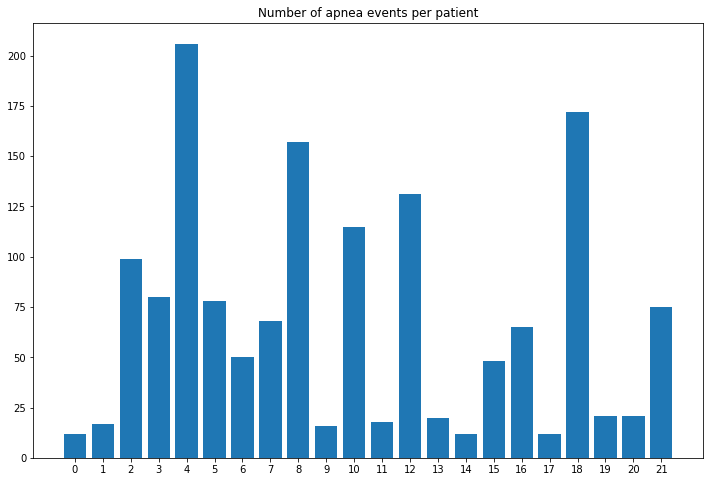

In [52]:
nb_buckets_per_patient = np.zeros(nb_patients)

for patient in range(nb_patients):
    condition = np.logical_and(patient * nb_windows_per_patient <= np.asarray(starts)[:,0], np.asarray(starts)[:,0]<= (patient+1) * nb_windows_per_patient)
    nb_buckets_per_patient[patient] = np.sum(condition)
    
print('Number of apnea events per patient', nb_buckets_per_patient)

plt.figure(figsize =(12,8))
plt.bar(range(nb_patients),nb_buckets_per_patient)
plt.xticks(range(nb_patients))
plt.title("Number of apnea events per patient")
plt.show()

Location of apnea events (1st and 2nd columns) and their duration (3rd column)over all patients 
 
 [[   0.   52.   16.]
 [  18.   34.   12.]
 [  18.   72.   18.]
 ...
 [4396.    0.   12.]
 [4396.   28.   32.]
 [4396.   75.   15.]]


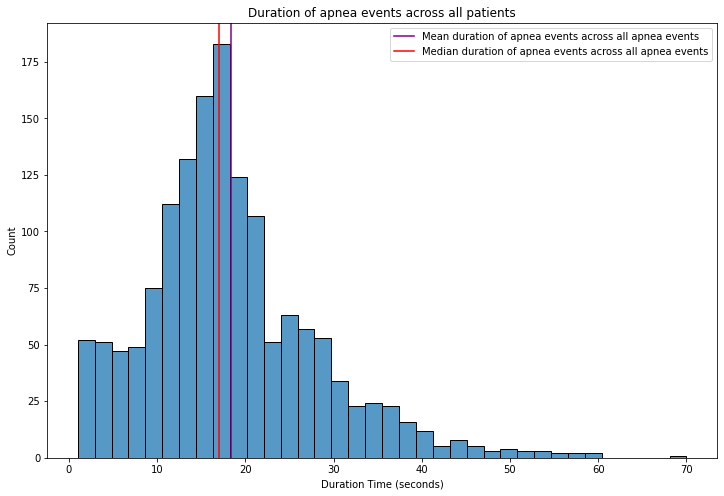

In [78]:
apnea_events = np.zeros((np.shape(starts)[0], 3)) ## each column corresponds to row, column, duration of apnea event
for k in range(np.shape(starts)[0]): 
    apnea_events[k] = [starts[k,0], starts[k,1], (ends-starts)[k,1] + 1]

print("Location of apnea events (1st and 2nd columns) and their duration (3rd column)over all patients \n \n", apnea_events)

## average of apnea duration over all patients 

plt.figure(figsize=(12,8))
sns.histplot(apnea_events[:,2])
plt.axvline(x=apnea_events[:,2].mean(), color="purple",label='Mean duration of apnea events across all apnea events')
plt.axvline(x=np.median(apnea_events[:,2]), color="red",label='Median duration of apnea events across all apnea events')
plt.title('Duration of apnea events across all patients')
plt.xlabel("Duration Time (seconds)")
plt.legend()
plt.show()

In [77]:
## let's see how this duration is correlated to the patient we consider

duration_per_patient = list()
k=0
for i in range(nb_patients):
    list_duration_patient_i=[]
    while apnea_events[k,0]<= (i+1) * nb_windows_per_patient:
        list_duration_patient_i.append(apnea_events[k,2])
        k+=1
        if (k == np.shape(apnea_events)[0]): break
    duration_per_patient.append(list_duration_patient_i)

In [28]:
df_per_patient = pd.DataFrame(duration_per_patient).transpose() ## each column is a patient, all rows are his 
                                                                ## apnea events duration
df_per_patient

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,16.0,44.0,20.0,18.0,27.0,15.0,6.0,15.0,14.0,7.0,...,19.0,12.0,21.0,3.0,24.0,13.0,3.0,3.0,2.0,16.0
1,12.0,12.0,18.0,12.0,20.0,17.0,9.0,16.0,13.0,13.0,...,6.0,18.0,8.0,12.0,8.0,12.0,28.0,18.0,15.0,18.0
2,18.0,51.0,2.0,13.0,46.0,22.0,28.0,23.0,18.0,13.0,...,29.0,24.0,7.0,14.0,7.0,15.0,29.0,22.0,12.0,17.0
3,16.0,26.0,13.0,8.0,4.0,23.0,26.0,19.0,3.0,3.0,...,15.0,11.0,40.0,20.0,18.0,12.0,14.0,14.0,13.0,14.0
4,26.0,15.0,20.0,20.0,16.0,23.0,26.0,1.0,9.0,7.0,...,9.0,14.0,25.0,16.0,7.0,2.0,13.0,12.0,13.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


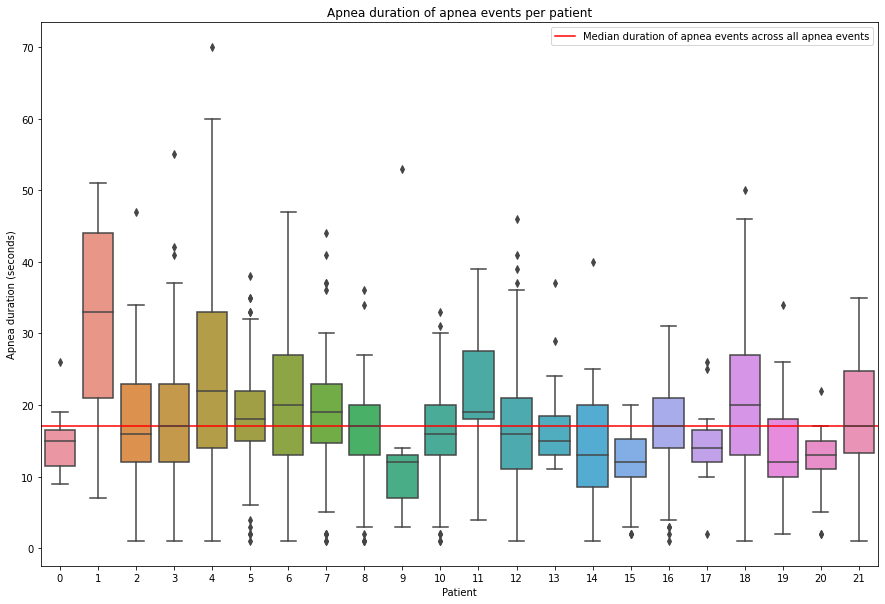

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_per_patient)
plt.title('Apnea duration of apnea events per patient')
plt.xlabel("Patient")
plt.ylabel("Apnea duration (seconds)")
plt.axhline(y=np.median(apnea_events[:,2]), color="red",label='Median duration of apnea events across all apnea events')
plt.legend()
plt.show()

In [90]:
array_per_patient = np.zeros((nb_patients, nb_windows_per_patient * window_time))
patient = 0
data = []
for i, window_id in enumerate(range(nb_windows_per_patient * nb_patients), 1):
    data+=list(myFile[window_id])
    if i % nb_windows_per_patient == 0:
        array_per_patient[patient, :] = np.asarray(data)
        data = []
        patient+=1

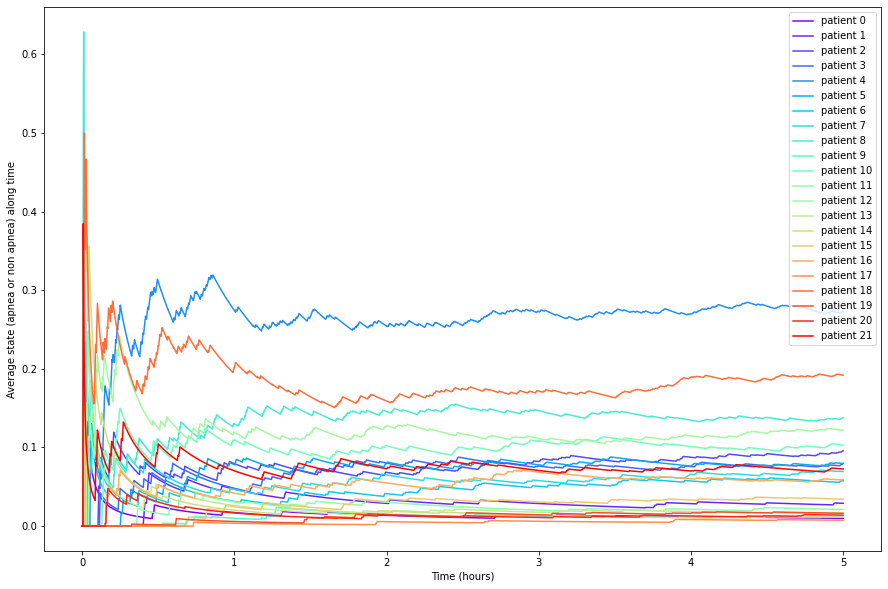

In [112]:
cum_apnea_time = np.zeros_like(array_per_patient) ## per patient
for patient_id in range(nb_patients):
    cum_apnea_time[patient_id, :] = np.cumsum(array_per_patient[patient_id,:])/(np.arange(1,nb_windows_per_patient * window_time + 1))

plt.figure(figsize=(15,10))
colors = cm.rainbow(np.linspace(0, 1, nb_patients))
for i in range(nb_patients):
    plt.plot(np.arange(nb_windows_per_patient * window_time) / 3600, cum_apnea_time[i],
             label='patient '+ str(i), color = colors[i])

plt.xlabel("Time (hours)")
plt.ylabel("Average state (apnea or non apnea) along time")
plt.legend()
plt.show()

In [127]:
total_time = nb_windows_per_patient * window_time
bins = int(total_time / 1)
discretized_array_per_patient = np.zeros((bins))
cur_time = 0
for bin_id in range(bins):
    discretized_array_per_patient[bin_id] = np.mean(array_per_patient[:, cur_time: cur_time + 100])
    cur_time += 100

/Users/naitsaadathiziri/Workspace/miniconda3/envs/test/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/naitsaadathiziri/Workspace/miniconda3/envs/test/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


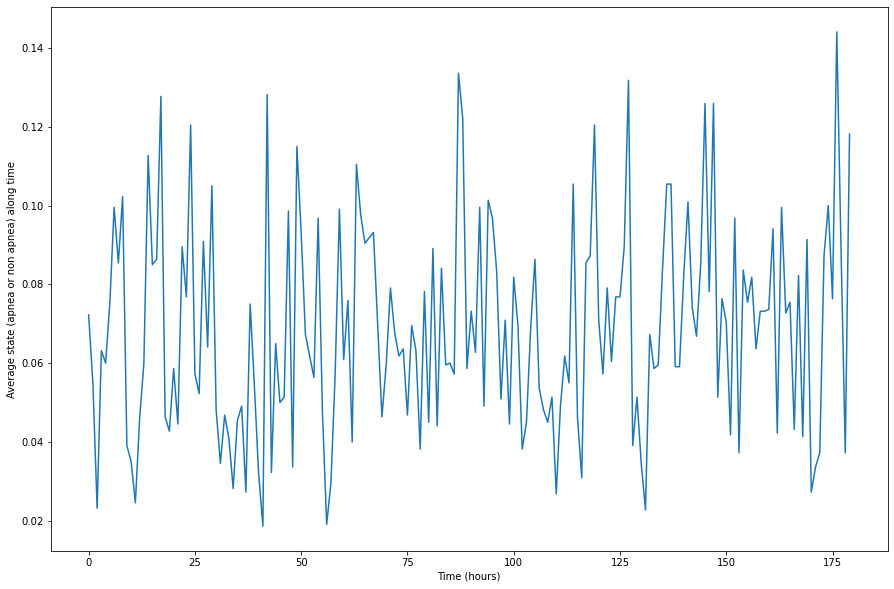

In [129]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(bins), discretized_array_per_patient)

plt.xlabel("Time (hours)")
plt.ylabel("Average state (apnea or non apnea) along time across all patients") ## no direct inference
                        ## can be done : not really cyclic, not any preferenced of time of apnea across the night...
    
plt.show()

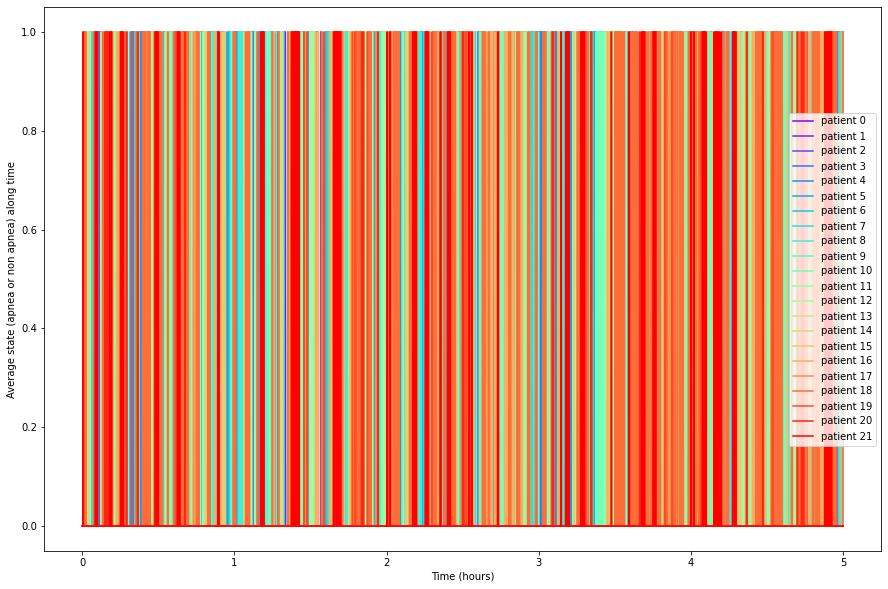

In [113]:
plt.figure(figsize=(15,10))
colors = cm.rainbow(np.linspace(0, 1, nb_patients))
for i in range(nb_patients):
    plt.plot(np.arange(nb_windows_per_patient * window_time) / 3600, array_per_patient[i],
             label='patient '+ str(i), color = colors[i])

plt.xlabel("Time (hours)")
plt.ylabel("Average state (apnea or non apnea) along time")
plt.legend()
plt.show()